In [1]:
# Task 2: Deep Learning Model for Image Classification (CIFAR-10)

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# 2. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 3. Train model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# 4. Save model
model.save("cifar10_model.h5")

# 5. Plot training accuracy & loss
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title("Accuracy")
plt.savefig("accuracy.png"); plt.close()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title("Loss")
plt.savefig("loss.png"); plt.close()

# 6. Evaluate model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_test, y_pred_classes)
np.save("confusion_matrix.npy", cm)

# 7. Show some predictions
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_test[i][0]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis("off")
plt.savefig("sample_predictions.png")
plt.close()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.3319 - loss: 1.7831 - val_accuracy: 0.5355 - val_loss: 1.2830
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.5700 - loss: 1.2037 - val_accuracy: 0.6180 - val_loss: 1.0619
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.6377 - loss: 1.0350 - val_accuracy: 0.6386 - val_loss: 1.0454
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.6773 - loss: 0.9187 - val_accuracy: 0.6828 - val_loss: 0.9217
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7060 - loss: 0.8397 - val_accuracy: 0.6874 - val_loss: 0.8840
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.7253 - loss: 0.7819 - val_accuracy: 0.6946 - val_loss: 0.8784
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7432 - loss: 0.7360 - val_accuracy: 0.7064 - val_loss: 0.8567
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.7595 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.76      0.74      1000
  automobile       0.78      0.86      0.82      1000
        bird       0.70      0.56      0.62      1000
         cat       0.49      0.59      0.54      1000
        deer       0.69      0.59      0.64      1000
         dog       0.70      0.51      0.59      1000
        frog       0.70      0.84      0.76      1000
       horse       0.67      0.82      0.74      1000
        ship       0.85      0.80      0.82      1000
       truck       0.84      0.74      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



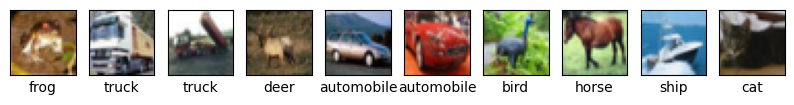

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show first 10 images from training set
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])  # show the image
    plt.xlabel(class_names[y_train[i][0]])  # show the label
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


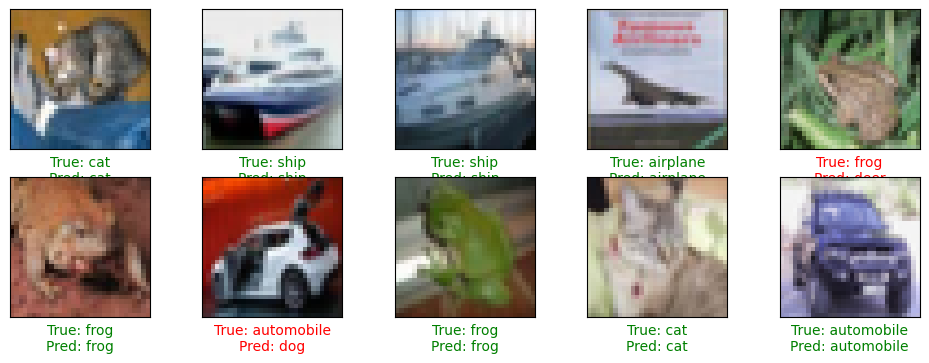

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize (same as you did in training)
x_test = x_test / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get predictions from your trained model
predictions = model.predict(x_test)

# Show first 10 test images with true & predicted labels
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    true_label = class_names[y_test[i][0]]
    pred_label = class_names[np.argmax(predictions[i])]

    color = "green" if true_label == pred_label else "red"
    plt.xlabel(f"True: {true_label}\nPred: {pred_label}", color=color)

plt.show()


In [4]:
from google.colab import files

# Download important results
files.download("accuracy.png")
files.download("loss.png")
files.download("sample_predictions.png")
files.download("cifar10_model.h5")
files.download("confusion_matrix.npy")

# Save classification report as text file
report = classification_report(y_test, y_pred_classes, target_names=class_names)
with open("classification_report.txt", "w") as f:
    f.write(report)

files.download("classification_report.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>